In [38]:
# Package Imports

# Data/numeric manipulation
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

# Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Modelling & Evaluation
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix


In [2]:
### Load Data

# Read in data
train_data = pd.read_csv(r'C:\Users\Angus\Documents\UTS MDSI\Advanced DSI\NBA Kaggle\adsi_g5_kaggle_nba\data\train.csv')
test_data = pd.read_csv(r'C:\Users\Angus\Documents\UTS MDSI\Advanced DSI\NBA Kaggle\adsi_g5_kaggle_nba\data\test.csv')

In [24]:
# Adjust data
train_data_x = train_data.copy()
train_data_x = train_data_x.drop(['Id_old', 'Id'], axis=1)
train_data_target = train_data_x.pop('TARGET_5Yrs')
test_data_x = test_data.drop(['Id_old', 'Id'], axis=1)

# MinMax Adjust data
scaler = MinMaxScaler()
df_train_scaled = pd.DataFrame(scaler.fit_transform(train_data_x), columns=train_data_x.columns)
df_test_data_scaled = pd.DataFrame(scaler.fit_transform(test_data_x), columns=test_data_x.columns)

# train test val splits
X_data, X_test, y_data, y_test = train_test_split(df_train_scaled, train_data_target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [32]:
# Adjust data
# Returning to one dataframe
training_set = pd.concat([X_train, y_train], axis=1)

# Separating classes
Plus5Y = training_set[training_set.TARGET_5Yrs == 1]
NoPlus5Y = training_set[training_set.TARGET_5Yrs == 0]

In [33]:
# Oversampling the majority
oversample = resample(NoPlus5Y, 
                       replace=True, 
                       n_samples=len(Plus5Y), #set the number of samples to equal the number of the majority class
                       random_state=42)
# Returning to new training set
oversample_train = pd.concat([Plus5Y, oversample])
oversample_train.TARGET_5Yrs.value_counts(normalize=True)

# Set data for analysis
# Separate oversampled data into X and y sets
oversample_x_train = oversample_train.drop('TARGET_5Yrs', axis=1)
oversample_y_train = oversample_train.TARGET_5Yrs


In [34]:
# Train RF Model

clf = RandomForestClassifier(max_depth= 9, 
                            min_samples_leaf= 1, 
                            min_samples_split= 5, 
                            n_estimators= 257)
clf.fit(oversample_x_train, oversample_y_train)
print(clf)

RandomForestClassifier(max_depth=9, min_samples_split=5, n_estimators=257)


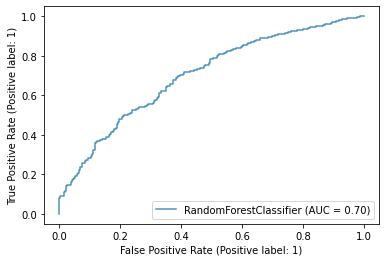

In [30]:
# Plot ROC AUC 

ax = plt.gca()
rfc_disp = plot_roc_curve(clf, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

In [31]:
# Model ROC
roc_auc_score(y_val, clf.predict_proba(X_val)[:,1])

0.7015930952152256

In [39]:
y_test_pred = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_test_pred)
print(conf_mat)

[[ 129  134]
 [ 288 1049]]


In [20]:
### Print out

# Train RF Model

clf = RandomForestClassifier(max_depth= 9, 
                            min_samples_leaf= 1, 
                            min_samples_split= 5, 
                            n_estimators= 257)
clf.fit(df_train_scaled, train_data_target)
print(clf)

RandomForestClassifier(max_depth=9, min_samples_split=5, n_estimators=257)


In [35]:
# Check against test set
y_pred = clf.predict(df_test_data_scaled)

# Submission output
preddf = pd.DataFrame(y_pred, columns=['TARGET_5Yrs'])
submit = pd.DataFrame(test_data['Id']).merge(preddf, right_index=True, left_index=True, how='left')

submit.head()

,Id,TARGET_5Yrs
0,0,0.0
1,1,0.0
2,2,1.0
3,3,1.0
4,4,0.0


In [37]:
# Print out
submit.to_csv(r'C:\Users\Angus\Documents\UTS MDSI\Advanced DSI\NBA Kaggle\ANSubmitRFUpspl.csv')

In [36]:
# Save model
from joblib import dump  

dump(clf, r'C:\Users\Angus\Documents\UTS MDSI\Advanced DSI\NBA Kaggle\adsi_g5_kaggle_nba\models\AN_HP_RF_UpSpml.joblib')

['C:\\Users\\Angus\\Documents\\UTS MDSI\\Advanced DSI\\NBA Kaggle\\adsi_g5_kaggle_nba\\models\\AN_HP_RF_UpSpml.joblib']